In [1]:
import numpy as np
import matplotlib.pyplot as plt

############### Define Models ###################

# Gaussian intensity profile
def I(P,W,r):
    
    I = (P/(np.pi*W**2/2)) * np.exp(-2*r**2/W**2)
    
    return I

#P = power
#W = FWHM
#r = radial distance

# Overlap array
def overlap(Pc,Ps,Wc,Ws,r):
    
    eta = np.sum(I(Pc,Wc,r) * I(Ps,Ws,r))
    
    return eta

# Normalisation constant
def C(Pc,Ps,Wc,Ws,r):
    
    C = 1 / np.sum(I(Pc,Wc,r) * I(Ps,Ws,r))
    
    return C

# Waveguide control power needed for unity efficiency
def Pcw_unity(Psw,Ww,Cb,r):
    
    Pcw = (np.pi**2*Ww**4) / (Cb*4*Psw*np.sum(np.exp((-4*r**2)/Ww**2)))
    
    return Pcw

In [2]:
################### Set Parameters #####################

Wb = 1              # Bulk width
Ww = np.linspace(Wb/3000,Wb/3,100,1000) # Waveguide width
Pcb = 10             # Control power in bulk
Psb = Pcb/1e15        # Single-photon power in bulk

# Normalize rabi-freq when coupling into waveguide 
#Pcw = Pcb * Ww**2 / Wb**2 #* np.exp(1/Wb**2 - 1/Ww**2)
Psw = Psb #* Ww**2 / Wb**2 * np.exp(1/Wb**2 - 1/Ww**2)

r = np.linspace(-3,3,100)   # radial range

C:\Users\fdg2\AppData\Local\Temp\ipykernel_22980\1247403410.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1 / np.sum(I(Pc,Wc,r) * I(Ps,Ws,r))
C:\Users\fdg2\AppData\Local\Temp\ipykernel_22980\1247403410.py:34: RuntimeWarning: invalid value encountered in double_scalars
  Pcw = (np.pi**2*Ww**4) / (Cb*4*Psw*np.sum(np.exp((-4*r**2)/Ww**2)))


Text(0, 0.5, 'Rabi-Frequency $\\frac{\\Omega_{W}}{\\Omega_{B}}$')

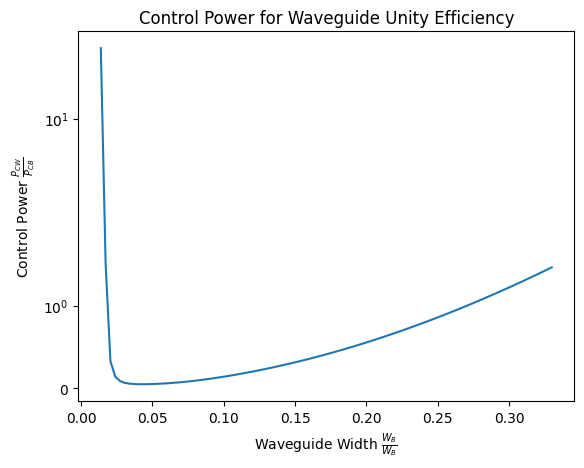

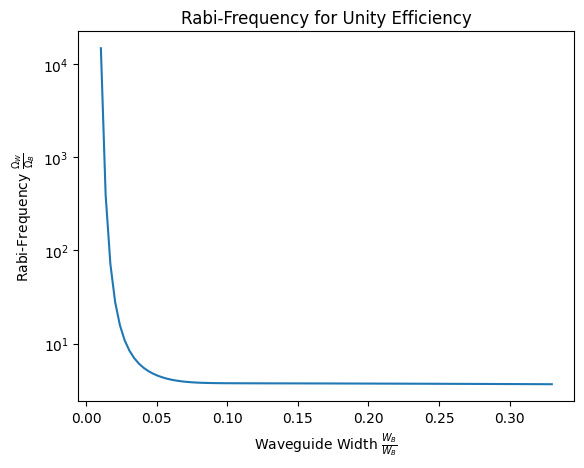

In [4]:
################### Compute Efficiency #####################

Cb = np.zeros(len(Ww))
Pcw = np.zeros(len(Ww))

for i in range(len(Ww)):
    
    Cb[i] = C(Pcb,Psb,Wb,Ww[i],r)
    
    Pcw[i] = Pcw_unity(Psw,Ww[i],Cb[i],r)
    
Rabi = (Pcw/Ww**2)**0.5

################### Plot figures #####################

plt.figure()
plt.title('Control Power for Waveguide Unity Efficiency')

plt.plot(Ww[4:-1],Pcw[4:-1], label='Control Power in Waveguide')

plt.yscale('symlog')

plt.xlabel(r'Waveguide Width $\frac{W_B}{W_B}$')
plt.ylabel(r'Control Power $\frac{P_{CW}}{P_{CB}}$')

#plt.savefig('Control power for unity efficiency.png', dpi=300)

plt.figure()
plt.title('Rabi-Frequency for Unity Efficiency')

plt.plot(Ww[3:-1],Rabi[3:-1], label='Rabi frequency proportional increase')

plt.yscale('symlog')

plt.xlabel(r'Waveguide Width $\frac{W_B}{W_B}$')
plt.ylabel(r'Rabi-Frequency $\frac{\Omega_{W}}{\Omega_{B}}$')